In [82]:
library(xts)

In [3]:
df <- read.csv("VIs_benj.csv")
head(df)

Typhoon,Image,Training.Accuracy,Validation.Accuracy,NDVI,NDII,GRVI,EVI,Date
,LC08_116051_20130425,0.9812630,0.8734525,0.3773794,0.1892725,0.03044464,2.723799,4/25/2013
"Gorio, Yolanda",LC08_116051_20131018,0.9824561,0.8857576,0.3969654,0.2125754,0.03429518,3.153317,10/18/2013
,LC08_116051_20131119,0.9884993,0.9021076,0.3414103,0.1810273,0.02972560,3.445644,11/19/2013
,LC08_116051_20131221,0.9821477,0.8868435,0.3469877,0.1898755,0.02695693,2.676018,12/21/2013
Basyang,LC08_116051_20140106,0.9868587,0.8776171,0.3585148,0.1915019,0.02709970,3.149132,1/6/2014
,LC08_116051_20140207,0.9826911,0.8798028,0.3474689,0.1807510,0.02152270,2.535689,2/7/2014


In [6]:
class(df$Date)

[1] "factor"

In [20]:
df$Date <- as.Date(df$Date, format="%m/%d/%Y")

In [21]:
class(df$Date)

[1] "Date"

In [40]:
vis_ts <- xts(df$NDVI, order.by=df$Date)
vis_ts <- ts(df$NDVI, order.by=df$Date)
decompose(vis_ts)

ERROR: Error in decompose(vis_ts): time series has no or less than 2 periods


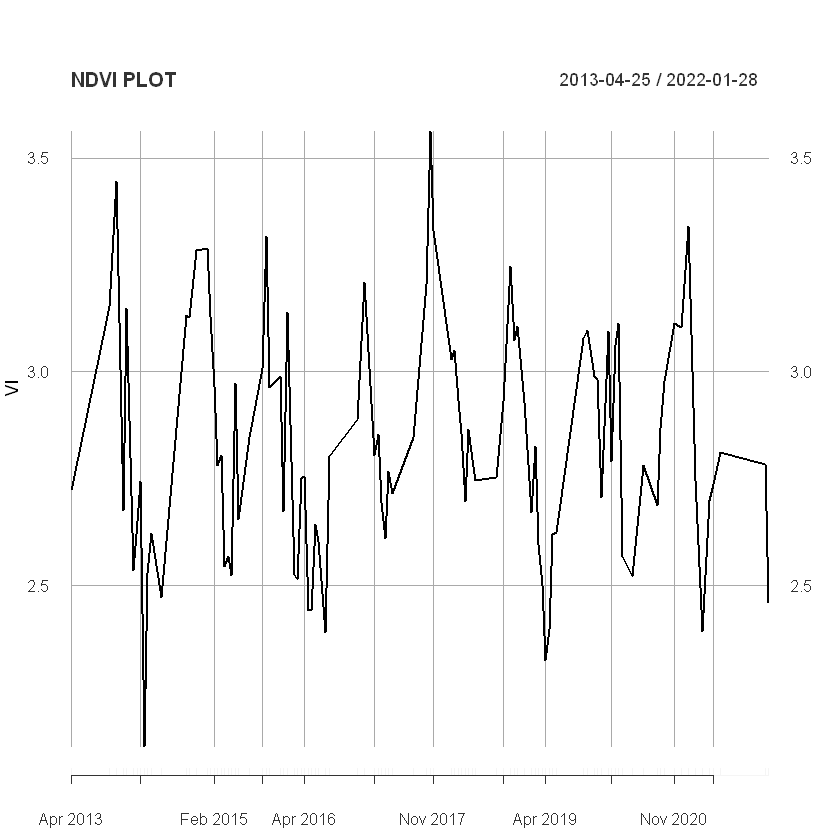

In [80]:

ks <- ksmooth(df$Date, df$NDVI, "normal", bandwidth = 100)
plot(vis_ts, main="NDVI PLOT", xlab="Date", ylab="VI")
lines(ks, lwd=4, lty=2)
      #col = 'red', type = 'l')

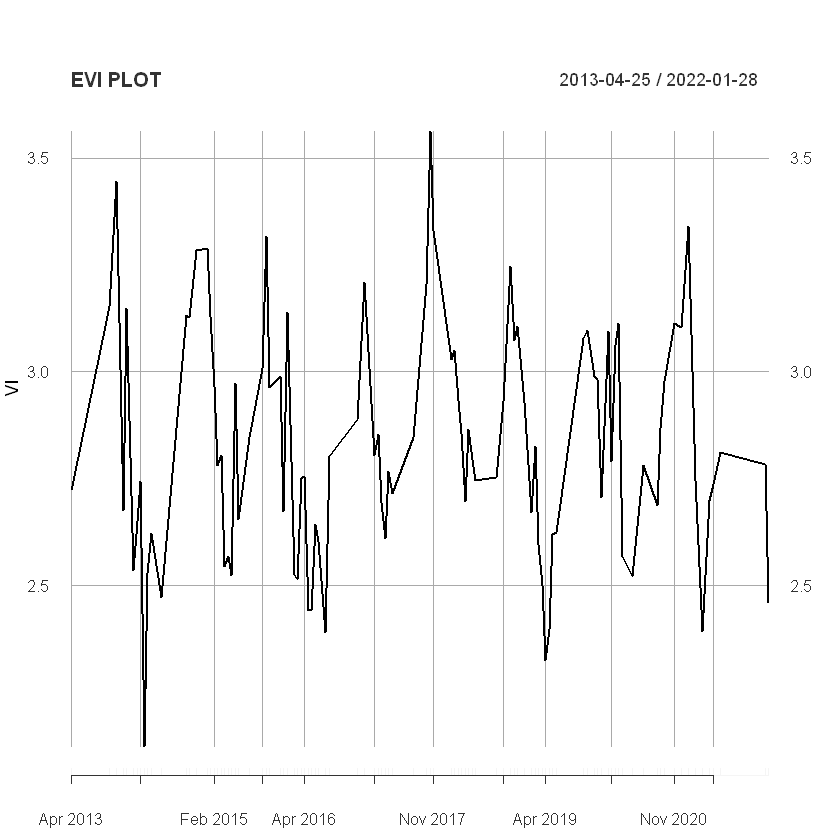

In [81]:
vis_ts <- xts(df$EVI, order.by=df$Date)
plot(vis_ts, main="EVI PLOT", xlab="Date", ylab="VI")


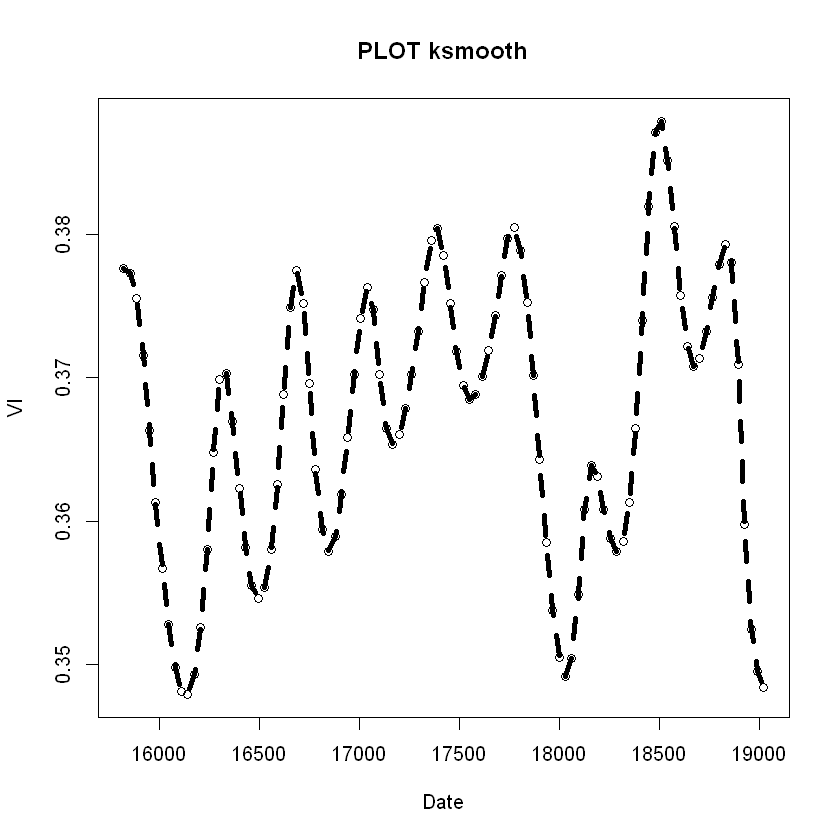

In [26]:
ks <- ksmooth(df$Date, df$NDVI, "normal", bandwidth = 200)

#plot(vis_ts, main="PLOT", xlab="Date", ylab="VI")
plot(ks, main="PLOT ksmooth", xlab="Date", ylab="VI")
lines(ks, lwd=4, lty=2)
      #col = 'red', type = 'l')

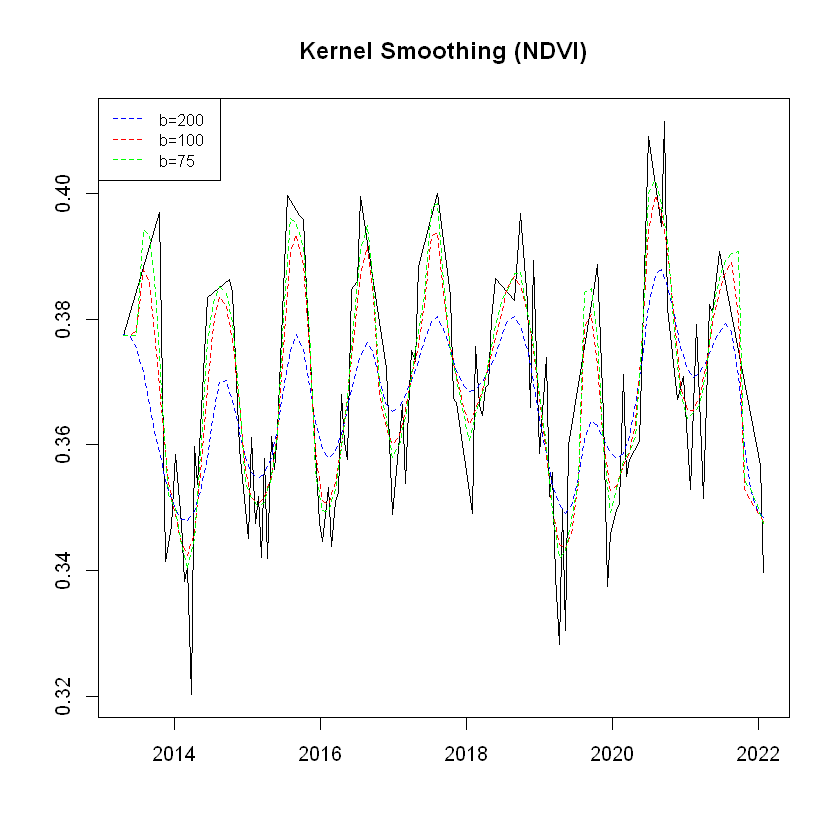

In [38]:
dt <- df$Date
y <- df$NDVI
plot(dt, y, type = 'l', 
     col = 'black', xlab = "", ylab = "",
     main = 'Kernel Smoothing (NDVI)')

lines(ksmooth(dt, y, "normal", bandwidth = 200), 
      col = 'blue', type = 'l', lty=2)
lines(ksmooth(dt, y, "normal", bandwidth = 100), 
      col = 'red', type = 'l', lty=2)
lines(ksmooth(dt, y, "normal", bandwidth = 75), 
      col = 'green', type = 'l', lty=2)

legend('topleft', 
       legend = c('b=200','b=100', "b=75"), 
       col = c('blue', 'red', 'green'),
       lty = 2,
       cex = 0.8)

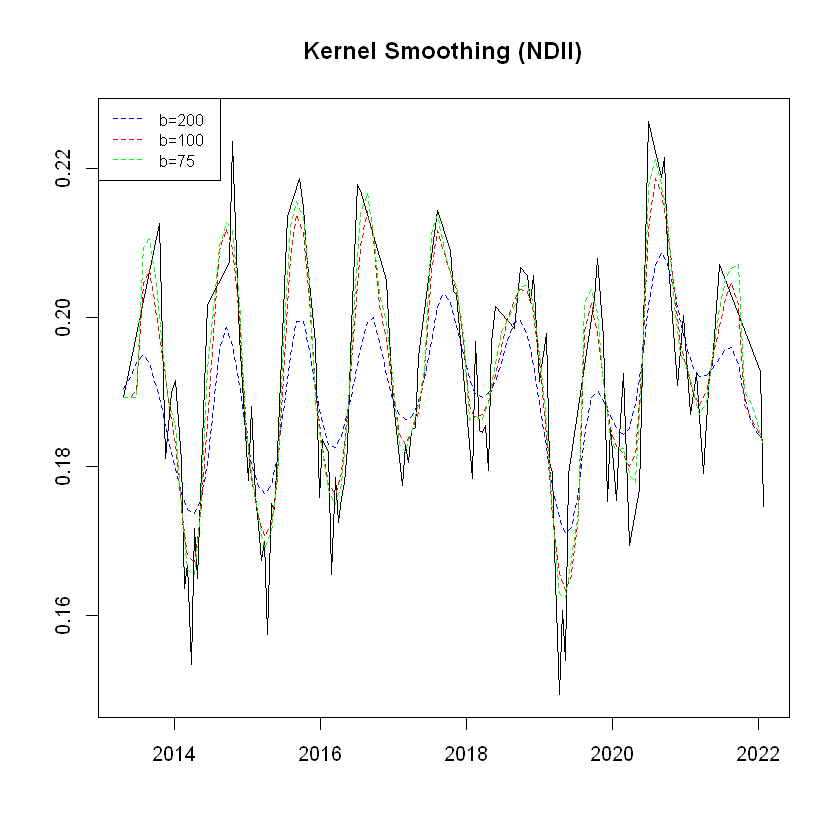

In [73]:
dt <- df$Date
y <- df$NDII
plot(dt, y, type = 'l', 
     col = 'black', xlab = "", ylab = "",
     main = 'Kernel Smoothing (NDII)')

lines(ksmooth(dt, y, "normal", bandwidth = 200), 
      col = 'blue', type = 'l', lty=2)
lines(ksmooth(dt, y, "normal", bandwidth = 100), 
      col = 'red', type = 'l', lty=2)
lines(ksmooth(dt, y, "normal", bandwidth = 75), 
      col = 'green', type = 'l', lty=2)

legend('topleft', 
       legend = c('b=200','b=100', "b=75"), 
       col = c('blue', 'red', 'green'),
       lty = 2,
       cex = 0.8)

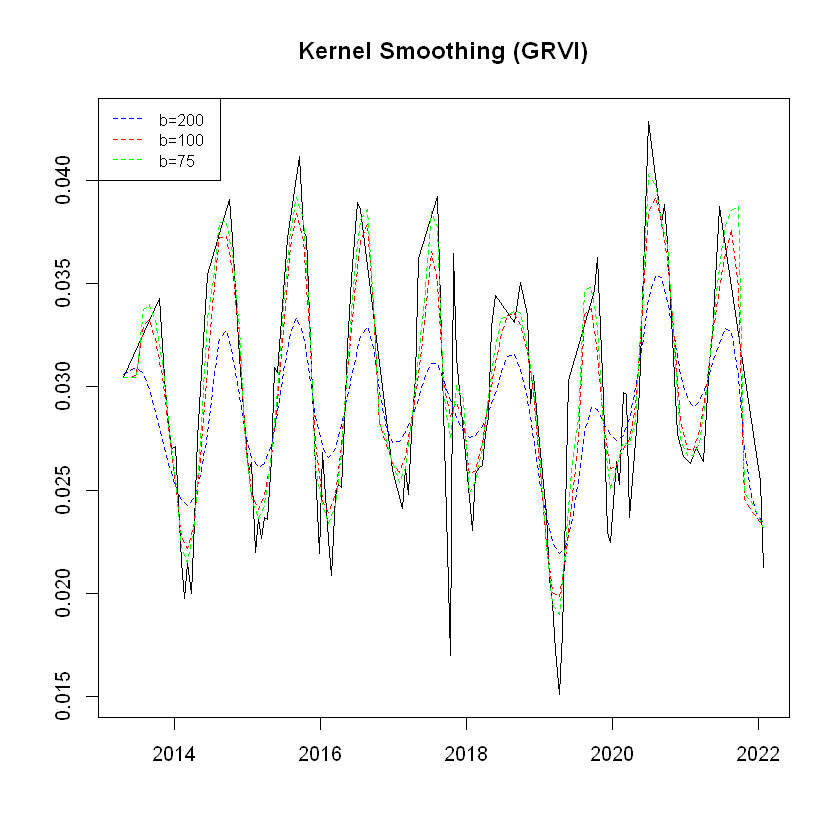

In [90]:
dt <- df$Date
y <- df$GRVI
plot(dt, y, type = 'l', 
     col = 'black', xlab = "", ylab = "",
     main = 'Kernel Smoothing (GRVI)')

#kernel regression
lines(ksmooth(dt, y, "normal", bandwidth = 200), 
      col = 'blue', type = 'l', lty=2)
lines(ksmooth(dt, y, "normal", bandwidth = 100), 
      col = 'red', type = 'l', lty=2)
lines(ksmooth(dt, y, "normal", bandwidth = 75), 
      col = 'green', type = 'l', lty=2)


legend('topleft', 
       legend = c('b=200','b=100', "b=75"), 
       col = c('blue', 'red', 'green'),
       lty = 2,
       cex = 0.8)

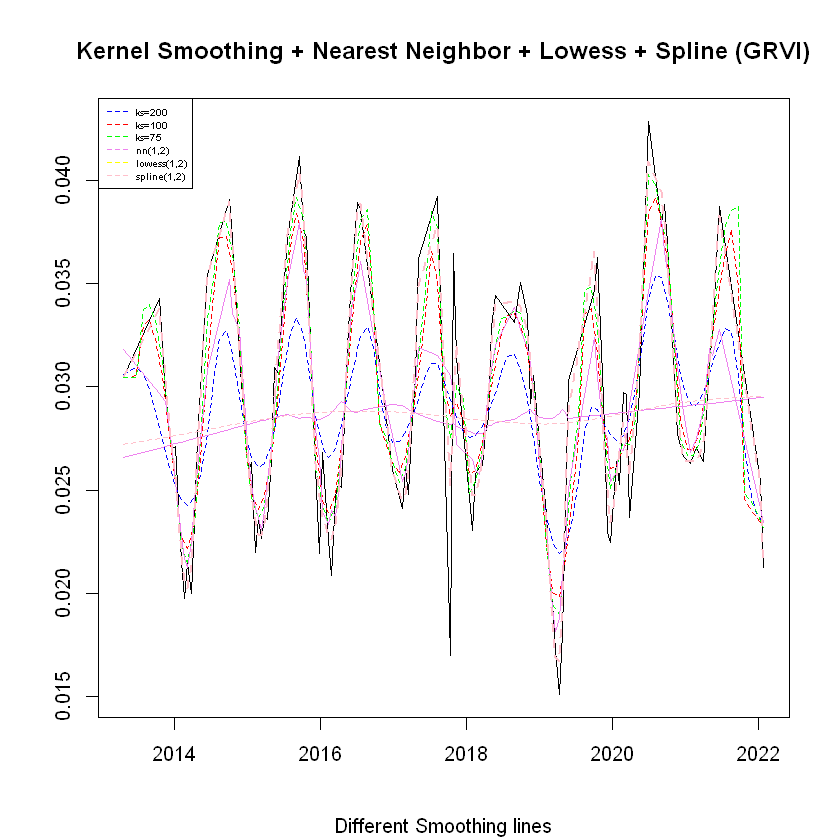

In [114]:
# Different Smoothing tests

dt <- df$Date
y <- df$GRVI
plot(dt, y, type = 'l', 
     col = 'black', xlab = "", ylab = "",
     main = 'Kernel Smoothing + Nearest Neighbor + Lowess + Spline (GRVI)',
     sub = 'Different Smoothing lines')

#kernel regression (3)
lines(ksmooth(dt, y, "normal", bandwidth = 200), 
      col = 'blue', type = 'l', lty=2)
lines(ksmooth(dt, y, "normal", bandwidth = 100), 
      col = 'red', type = 'l', lty=2)
lines(ksmooth(dt, y, "normal", bandwidth = 75), 
      col = 'green', type = 'l', lty=2)

# nearest neighbor (2)
lines(supsmu(dt, y, span=0.5), col="violet") # n/2 for trend component    
lines(supsmu(dt, y, span=0.01), col='violet')# n/100 for seasonal component


#lowess (2)
lines(lowess(y, f=0.02), col='yellow', lwd=2)# seasonal component (2% of data) 
lines(lowess(y, f=2/3), col='yellow')# trend (2/3 of data)

#spline (2)
lines(smooth.spline(dt, y), lty = 2, lwd=2, col="pink")               #spline1
lines(smooth.spline(dt, y, spar=1), lty = 2, lwd=1, col="pink")       #spline2

legend('topleft', 
       legend = c('ks=200','ks=100', "ks=75", "nn(1,2)", "lowess(1,2)", "spline(1,2)"), 
       col = c('blue', 'red', 'green', "violet", "yellow", "pink"),
       lty = 2,
       cex = 0.5)

Warning message:
"Use of `df$Date` is discouraged. Use `Date` instead."Warning message:
"Use of `df$NDVI` is discouraged. Use `NDVI` instead."Warning message:
"Use of `df$Date` is discouraged. Use `Date` instead."Warning message:
"Use of `df$NDII` is discouraged. Use `NDII` instead."Warning message:
"Use of `df$Date` is discouraged. Use `Date` instead."Warning message:
"Use of `df$GRVI` is discouraged. Use `GRVI` instead."

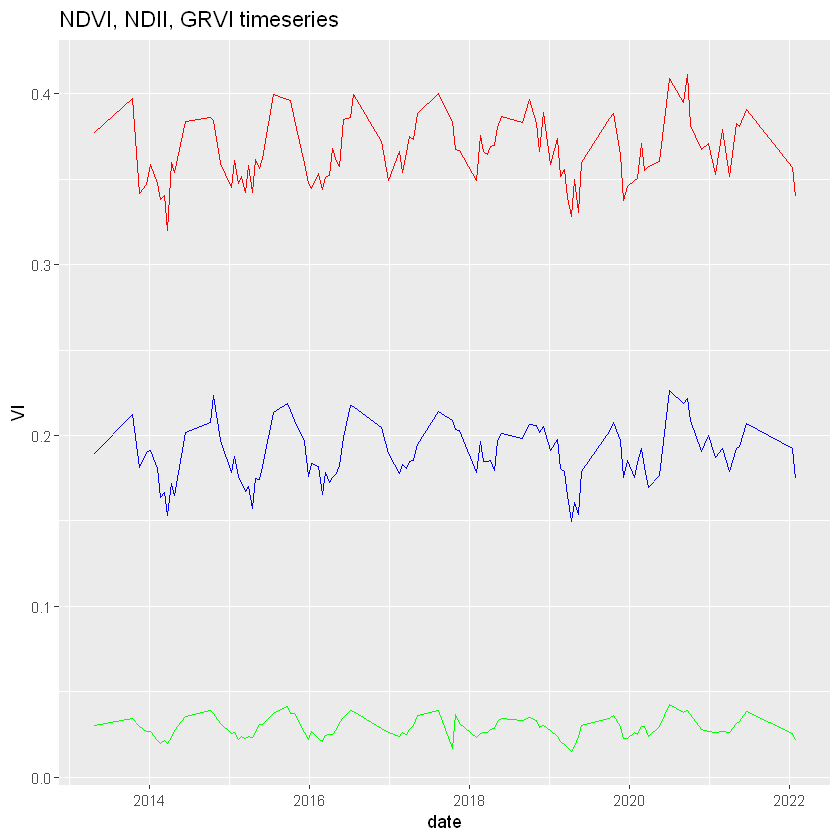

In [33]:
library(ggplot2)


ggplot() + 
  geom_line(data = df, aes(x = df$Date, y = df$NDVI), color = "red") +
  geom_line(data = df, aes(x = df$Date, y = df$NDII), color = "blue") +
  geom_line(data = df, aes(x = df$Date, y = df$GRVI), color = "green") +
  xlab('date') +
  ylab('VI') +
  ggtitle("NDVI, NDII, GRVI timeseries") 


#https://stackoverflow.com/questions/19921842/plotting-multiple-time-series-on-the-same-plot-using-ggplot

In [44]:
##Load typhoon data

df2 <- read.csv("VIS_typhoon_benj.csv")
head(df2)

df2$Start <- as.Date(df2$Start, format="%m/%d/%Y")
df2$End <- as.Date(df2$End, format="%m/%d/%Y")

Typhoon,Start,End,Speed..km.h.,Intensity..hPa.,X,X.1,X.2
Auring,2/17/2021,2/23/2021,75,996,NA,NA,NA
Dante,5/29/2021,6/6/2021,75,998,NA,NA,NA
Jolina,9/8/2021,9/10/2021,95,992,NA,NA,NA
Lannie,10/4/2021,10/8/2021,65,994,NA,NA,NA
Odette,12/12/2021,12/21/2021,195,915,NA,NA,NA
Ambo,5/10/2020,5/18/2020,155,960,NA,NA,NA


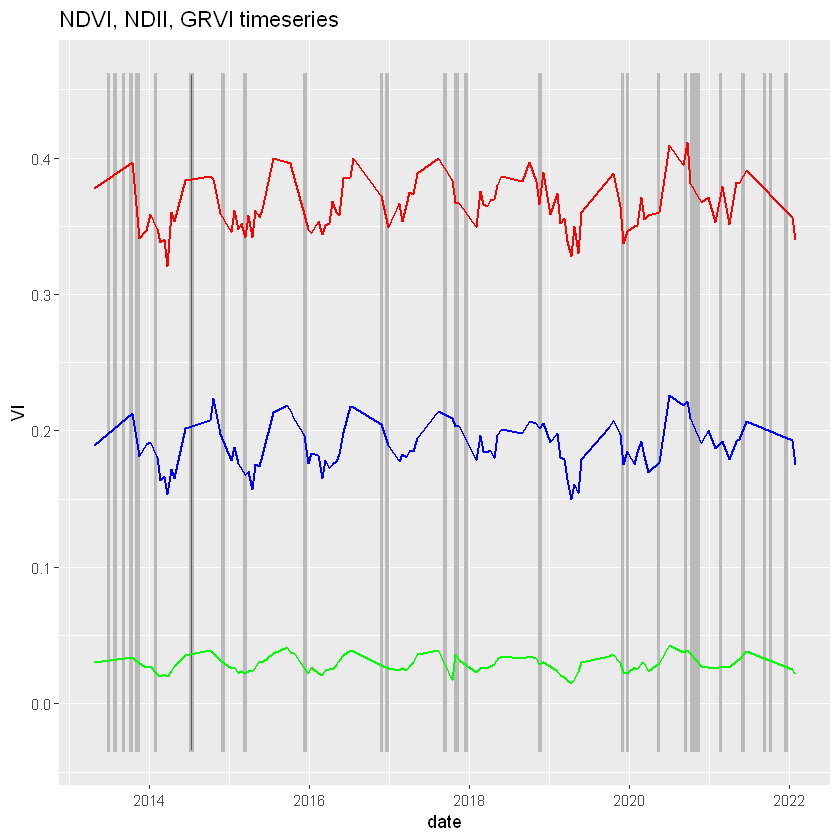

In [79]:
library(ggplot2)

#with Typhoons

ggplot() + 
  geom_rect(aes(xmin=df2$Start, xmax=df2$End, ymin=(min(df$GRVI)-0.05), ymax=(max(df$NDVI)+0.05)), size=0.6, colour="#BABABA", linetype=1) +
  geom_line(aes(x = df$Date, y = df$NDVI), color = "red", size=0.7) +
  geom_line(aes(x = df$Date, y = df$NDII), color = "blue", size=0.7) +
  geom_line(aes(x = df$Date, y = df$GRVI), color = "green", size=0.7) +
  xlab('date') +
  ylab('VI') +
  ggtitle("NDVI, NDII, GRVI timeseries") 

In [ ]:
library(ggplot2)

#with Typhoons



ksmoothed <- 
ggplot() + 
  geom_rect(aes(xmin=df2$Start, xmax=df2$End, ymin=(min(df$GRVI)-0.05), ymax=(max(df$NDVI)+0.05)), size=0.6, colour="#BABABA", linetype=1) +
  geom_line(aes(x = df$Date, y = df$NDVI), color = "red", size=0.7) +
  geom_line(aes(x = df$Date, y = df$NDII), color = "blue", size=0.7) +
  geom_line(aes(x = df$Date, y = df$GRVI), color = "green", size=0.7) +
  xlab('date') +
  ylab('VI') +
  ggtitle("NDVI, NDII, GRVI timeseries") 

In [31]:
#https://rc2e.com/timeseriesanalysis

library(KernSmooth)

t <- df$Date
data_ts <- xts(df$NDVI, order.by=df$Date)

gridsize_ndvi <- length(data_ts)
bw_ndvi <- dpill(t, data_ts, gridsize = gridsize)
lp <- locpoly(x = t, y = data_ts, bandwidth = bw, gridsize = gridsize)
smooth <- lp$y

ERROR: Error in merge.xts(..., all = all, fill = fill, suffixes = suffixes): dims [product 101] do not match the length of object [202]


In [ ]:
#plots ggplot
# http://www.sthda.com/english/wiki/be-awesome-in-ggplot2-a-practical-guide-to-be-highly-effective-r-software-and-data-visualization